In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit.database import qmdatabase as ScanSet
import torsionfit.model as Model
from torsionfit.backends import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots
from matplotlib.backends.backend_pdf import PdfPages
import torsionfit.parameters as par
from collections import OrderedDict
import numpy as np
from pymbar.timeseries import detectEquilibration
import tqdm

In [2]:
param_to_opt=[('CG331', 'CG321', 'CG321', 'CG331')]
param = CharmmParameterSet('../../../../../data/charmm_ff/top_all36_cgenff.rtf', 
                           '../../../../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../../../../structure/butane.psf'
scan = '../../../../torsion_scans/MP2_torsion_scan/'
# Print initial guess

# Create a butane scan with torsions on (to compare for difference potential)
butane_scan = ScanSet.parse_psi4_out(scan, structure)
optimized = butane_scan.remove_nonoptimized()
optimized.compute_energy(param)

# Turn off torsion
param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0

# Create butane scan with torsions off
optimized_0 = butane_scan.remove_nonoptimized()
optimized_0.compute_energy(param)

[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/100000/../../../../torsion_scans/MP2_torsion_scan/0/butane_0.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/100000/../../../../torsion_scans/MP2_torsion_scan/10/butane_10.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/100000/../../../../torsion_scans/MP2_torsion_scan/20/butane_20.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: ------------------------------------------------------------------------------------------

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/torsionfit-0+untagged.556.g949a22e-py3.5.egg/torsionfit/database/qmdatabase.py:188: UserWarning: Warning: Optimizer failed for /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/100000/../../../../torsion_scans/MP2_torsion_scan/10/butane_10.out2
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/100000/../../../../torsion_scans/MP2_torsion_scan/30/butane_30.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/100000/../../../../torsion_scans/MP2_torsion_scan/40/butane_40.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5_rj/100000/../../../../torsion_scans/MP2_torsion_scan/50/butane_50.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: ----------------------------------------------------------------------------------------

In [4]:
# Load samplers
dbs = OrderedDict()
for i in range(1, 24):
    dbs['db_{}'.format(i)] = sqlite_plus.load('random_100000_{}/random_100000_{}.sqlite'.format(i, i))

<DihedralTypes [<DihedralType; phi_k=0.141, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.139, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.116, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=5, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.136, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.120, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.117, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=5, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.163, per=2, phase=0.000,  scee=1.00

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<DihedralTypes [<DihedralType; phi_k=0.161, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.171, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.112, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=5, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.158, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.158, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.097, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=5, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.129, per=2, phase=0.000,  scee=1.00

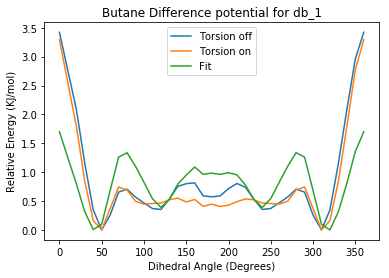

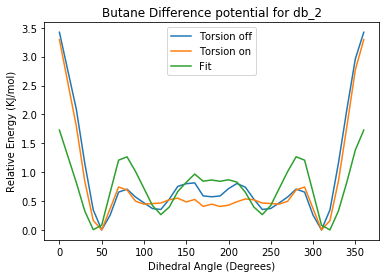

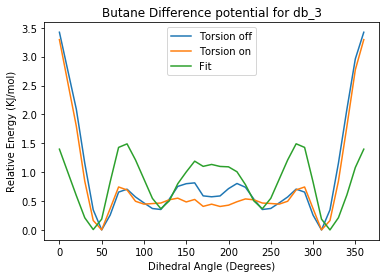

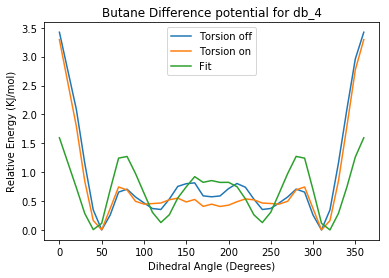

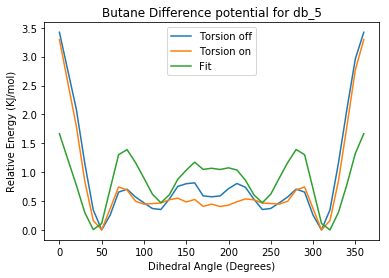

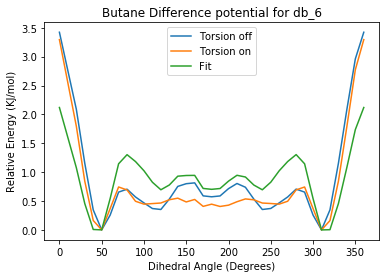

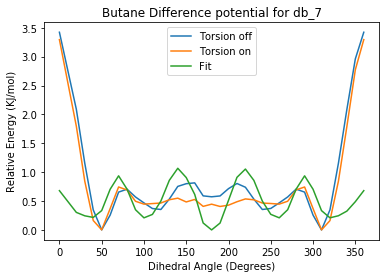

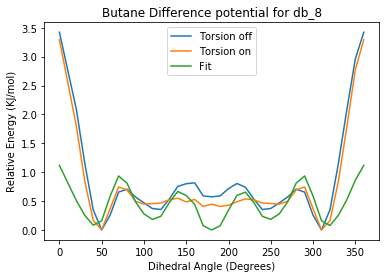

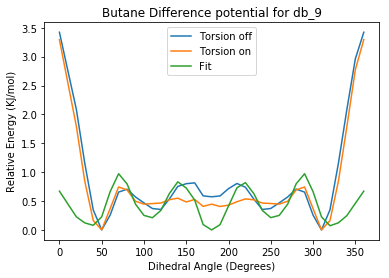

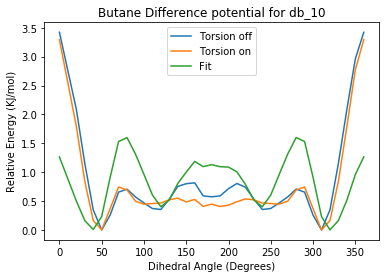

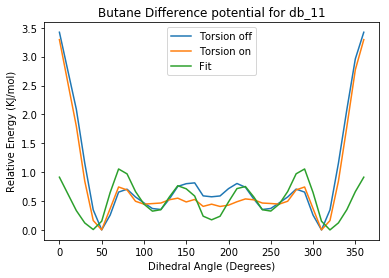

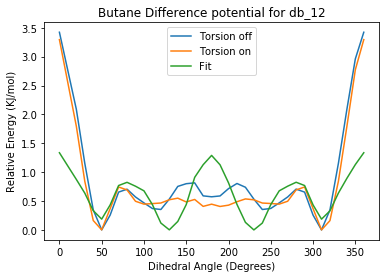

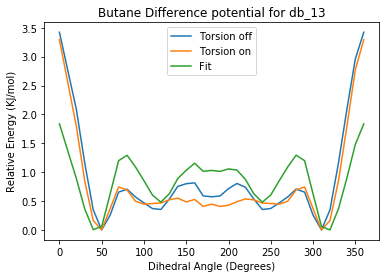

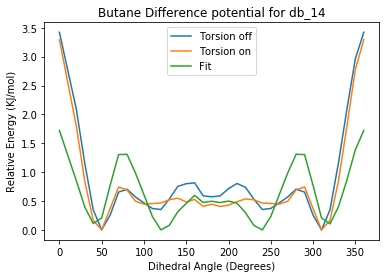

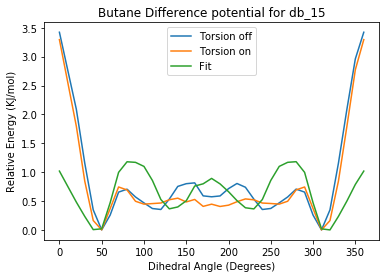

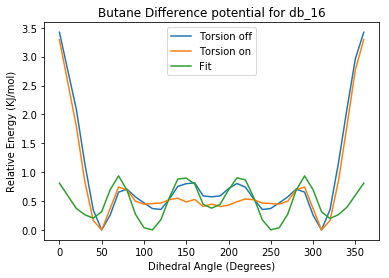

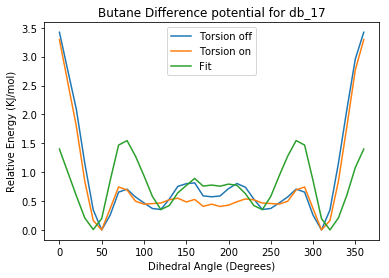

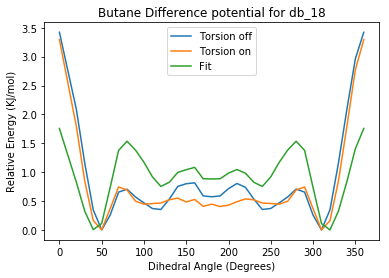

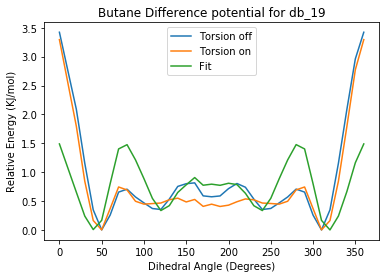

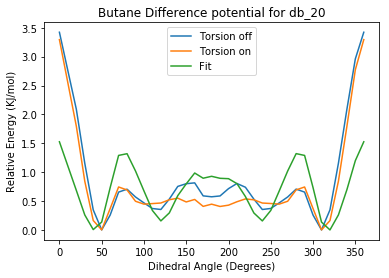

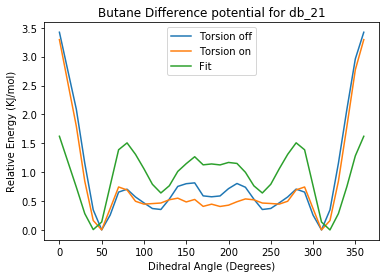

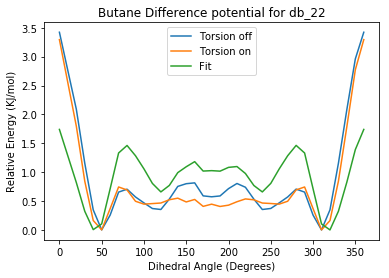

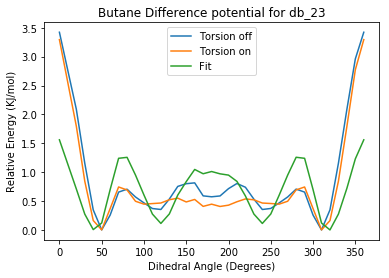

In [5]:
# Difference potential
# look at difference potential
new_param = CharmmParameterSet('../../../../../data/charmm_ff/top_all36_prot.rtf',
                              '../../../../../data/charmm_ff/par_all36_cgenff.prm')
new_struct = butane_scan.remove_nonoptimized()
# parameterize with db_0
par.add_missing(param_list=param_to_opt, param=new_param, sample_n5=True)
with PdfPages('difference_potential.pdf') as pdf:
    # Update parameters
    for db in dbs:
        plt.figure()
        par.update_param_from_sample(param_list=param_to_opt, param=new_param, db=dbs[db], n_5=True, rj=True)

        # Check
        print(new_param.dihedral_types[param_to_opt[0]])    
        new_struct.compute_energy(new_param)
        plt.plot(optimized_0.angles, optimized_0.delta_energy-min(optimized_0.delta_energy), label='Torsion off')
        plt.plot(optimized.angles, optimized.delta_energy-min(optimized.delta_energy), label='Torsion on')
        plt.plot(new_struct.angles, new_struct.delta_energy - min(new_struct.delta_energy), label='Fit')
        plt.legend()
        plt.xlabel('Dihedral Angle (Degrees)')
        plt.ylabel('Relative Energy (KJ/mol)')
        plt.title('Butane Difference potential for {}'.format(db))
        pdf.savefig()

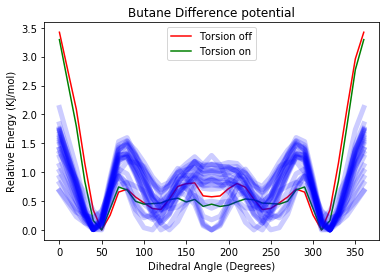

In [17]:
# look at difference potential
new_param = CharmmParameterSet('../../../../../data/charmm_ff/top_all36_prot.rtf',
                              '../../../../../data/charmm_ff/par_all36_cgenff.prm')
new_struct = butane_scan.remove_nonoptimized()
# parameterize with db_0
par.add_missing(param_list=param_to_opt, param=new_param, sample_n5=True)
par.set_phase_0(param_list=param_to_opt, param=new_param)
with PdfPages('difference_potential_all.pdf') as pdf:
    # Update parameters
    plt.plot(optimized_0.angles, optimized_0.delta_energy-min(optimized_0.delta_energy), label='Torsion off', color='red')
    plt.plot(optimized.angles, optimized.delta_energy-min(optimized.delta_energy), label='Torsion on', color='green')
    for db in dbs:
        par.update_param_from_sample(param_list=param_to_opt, param=new_param, db=dbs[db], n_5=True, rj=True)

        # Check
        new_struct.compute_energy(new_param)
        plt.plot(new_struct.angles, new_struct.delta_energy - min(new_struct.delta_energy), alpha=0.2, color='blue',
                linewidth=5)
        plt.xlabel('Dihedral Angle (Degrees)')
        plt.ylabel('Relative Energy (KJ/mol)')
        plt.title('Butane Difference potential')
    plt.legend()
    pdf.savefig()

In [ ]:
[t, g, Neff] = detectEquilibration(dbs['db_2'].sigma[:])


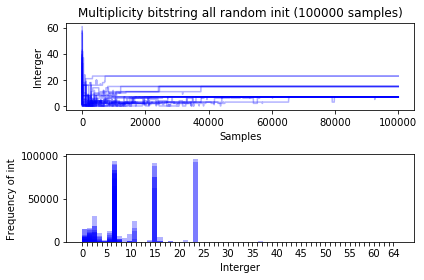

In [19]:
alpha=0.3
with PdfPages('multiplicity_all_random.pdf') as pdf: 
    bins = np.linspace(0, 65, 64)
    for db in dbs:
        plt.subplot(2, 1, 1)
        plt.title('Multiplicity bitstring all random init (100000 samples)')
        plt.plot(dbs[db].CG331_CG321_CG321_CG331_multiplicity_bitstring[:], alpha=alpha, color='blue')
        plt.ylabel('Interger')
        plt.xlabel('Samples')
        plt.subplot(2, 1, 2)
        plt.hist(dbs[db].CG331_CG321_CG321_CG331_multiplicity_bitstring[:], bins=bins, alpha=alpha, color='blue')
        plt.xticks(np.linspace(0, 64, 65), [0,'','','', '', 5, '', '', '', '', 10,'', '', '', '', 15,'', '', '', '',
                                        20,'', '', '', '', 25,'', '', '', '', 30, '', '', '', '',35,'', '', '', '',
                                        40,'', '', '', '', 45,'', '', '', '', 50,'', '', '', '', 55,'', '', '', '', 
                                        60, '', '', '', 64,])
        plt.xlabel('Interger')
        plt.ylabel('Frequency of int')
        plt.tight_layout()
        plt.tight_layout()
    pdf.savefig()

In [21]:
model = Model.TorsionFitModel(param, optimized_0, rj=True,
                                            param_to_opt=param_to_opt, sample_n5=True)

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


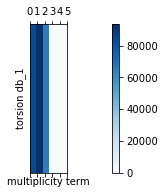

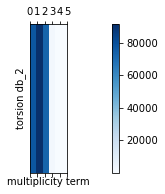

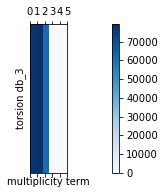

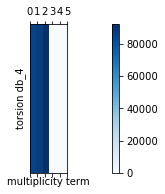

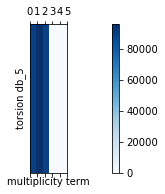

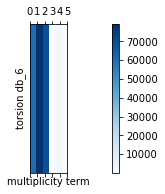

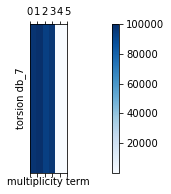

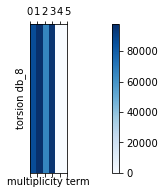

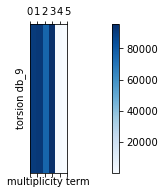

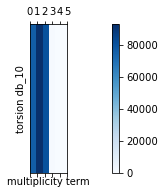

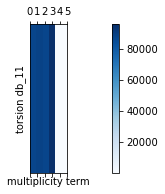

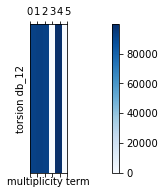

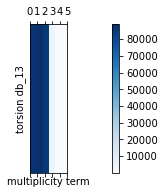

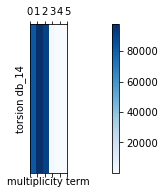

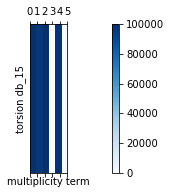

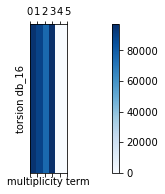

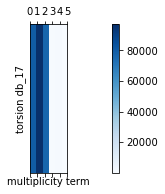

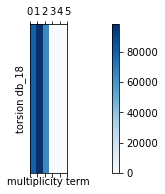

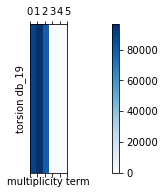

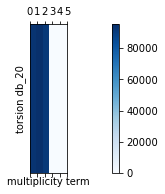

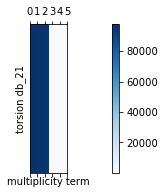

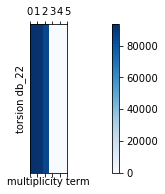

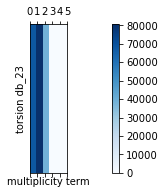

In [22]:
samples = 100000
burn = 0
multiplicities = (1,2,3,4,5,6)
mult_bitstring = []
for i in model.pymc_parameters.keys():
    if i.split('_')[-1] == 'bitstring':
        mult_bitstring.append(i)
        
with PdfPages('marg_mult.pdf') as pdf:
    for db in dbs:
        plt.figure()

        histogram = np.zeros((len(mult_bitstring), samples, 6))

        for m, torsion in enumerate(mult_bitstring):
            for i, j in enumerate(dbs[db].trace('%s' % torsion)[burn:]):
                for k, l in enumerate(multiplicities):
                    if 2**(l-1) & int(j):
                        histogram[m][i][k] = 1

        plt.matshow(histogram.sum(1), cmap='Blues',  extent=[0, 5, 0, 20]), plt.colorbar()
        plt.yticks([])
        plt.xlabel('multiplicity term')
        plt.ylabel('torsion {}'.format(db))
        pdf.savefig()

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


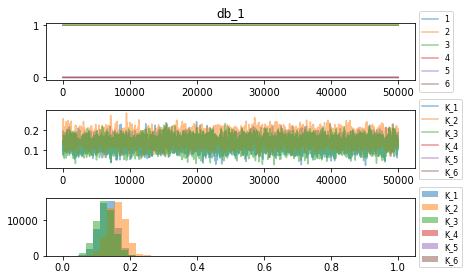

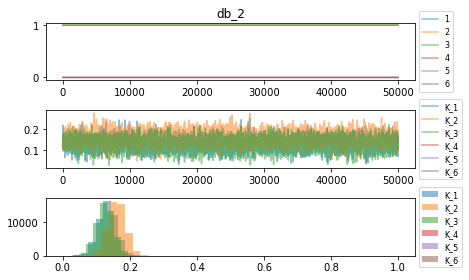

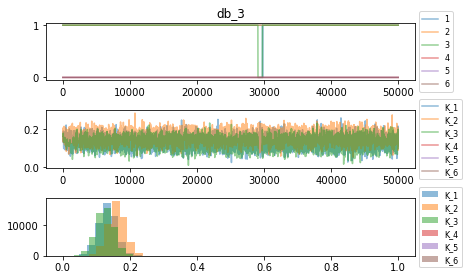

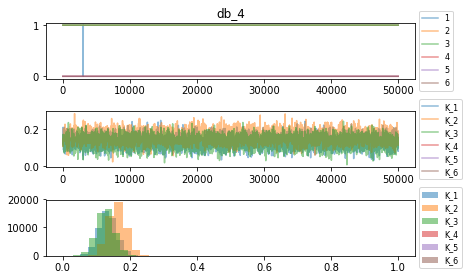

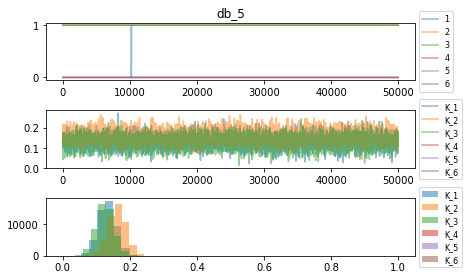

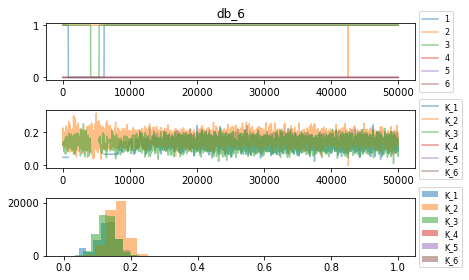

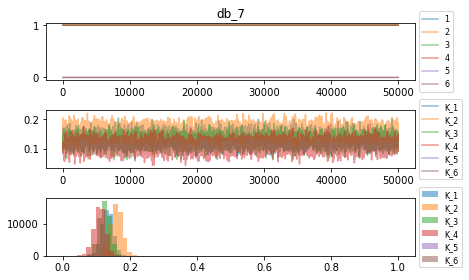

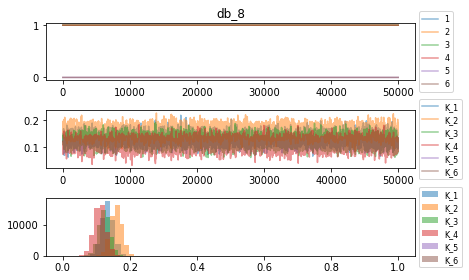

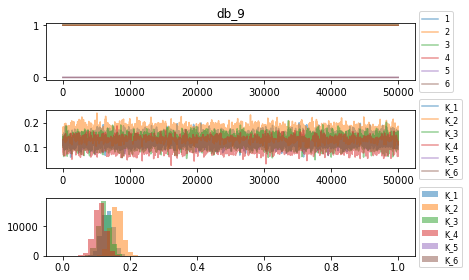

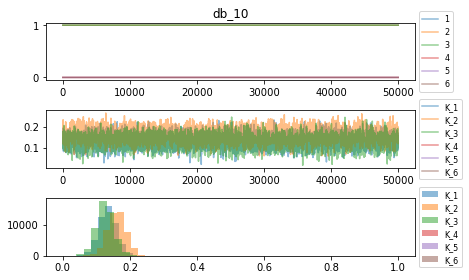

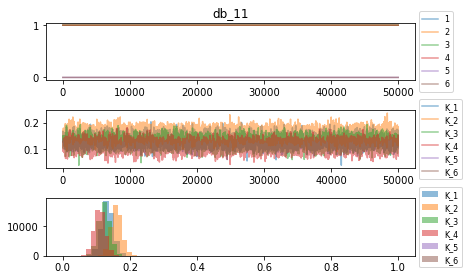

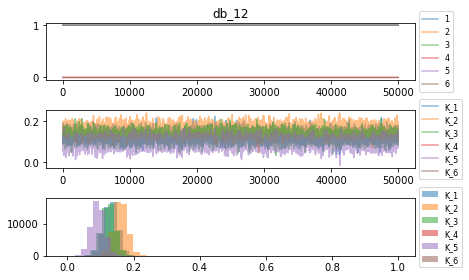

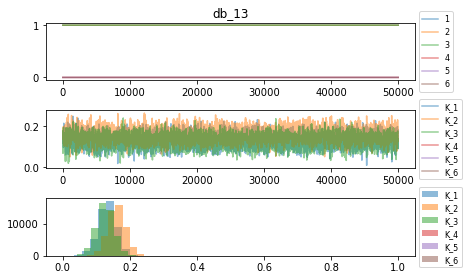

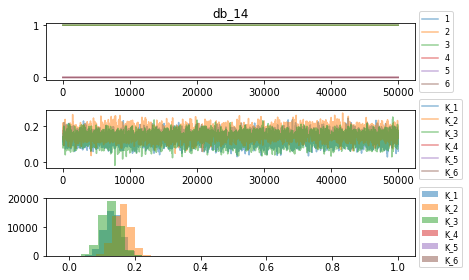

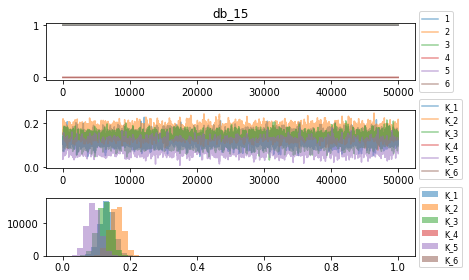

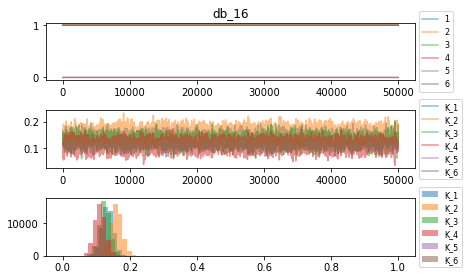

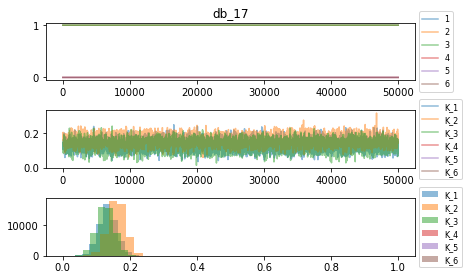

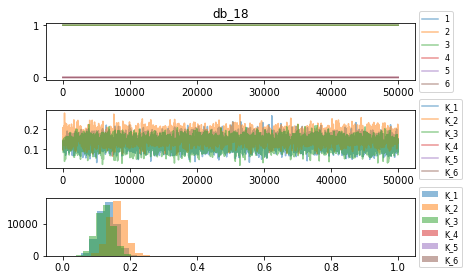

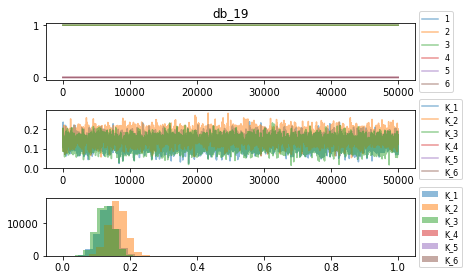

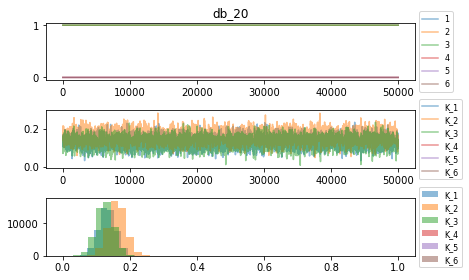

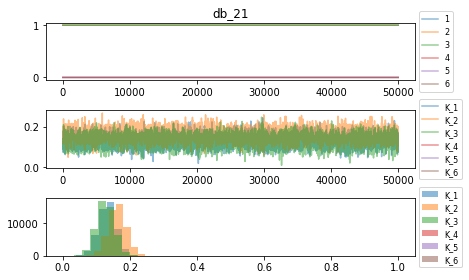

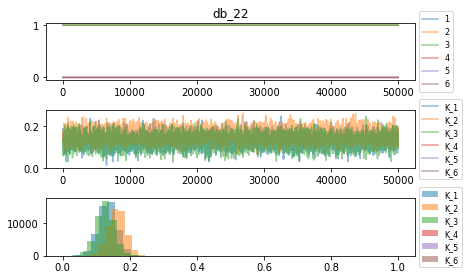

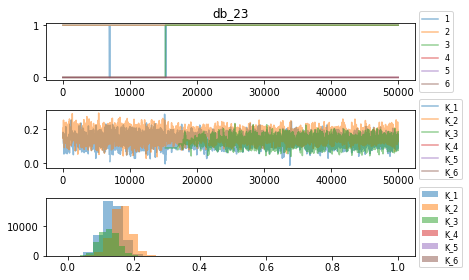

In [24]:
alpha=0.5               
with PdfPages('hist_traces.pdf') as pdf:
    for n, db in enumerate(dbs):
        plt.figure()
        histogram = np.zeros((len(mult_bitstring), samples, 6))
        for m, torsion in enumerate(mult_bitstring):
            for i, j in enumerate(dbs[db].trace('%s' % torsion)[:]):
                for k, l in enumerate(multiplicities):
                    if 2**(l-1) & int(j):
                        histogram[m][i][k] = 1
        for t in param_to_opt:
            t_name = t[0] + '_' + t[1] + '_' + t[2] + '_' + t[3]
            for m in multiplicities:
                name = t_name + '_' + str(m) + '_K'
                plt.subplot(3, 1, 1)
                plt.title('{}'.format(db))
                plt.plot(histogram[0, 50000:, m-1], label=str(m), alpha=alpha)
                lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
                trace = dbs[db].trace(name)[50000:]
                index_0 = np.where(histogram[0, 50000:, m-1] == 0)
                index_1 = np.where(histogram[0, 50000:, m-1] == 1)
                np.place(trace, histogram[0, 50000:, m-1] == 0, np.ones(len(index_0[0]))*np.nan)
                plt.subplot(3, 1, 2)
                plt.plot(trace, label='K_{}'.format(m), alpha=alpha)
                lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
                plt.subplot(3, 1, 3)
                plt.hist(trace[index_1], label='K_{}'.format(m), alpha=alpha)
                lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
                plt.tight_layout()
        pdf.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


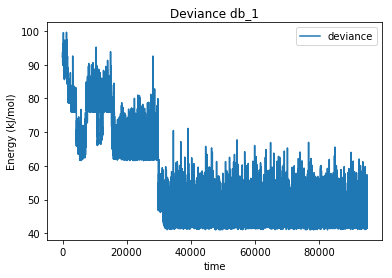

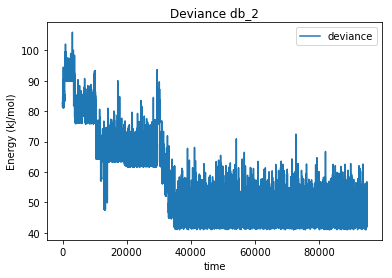

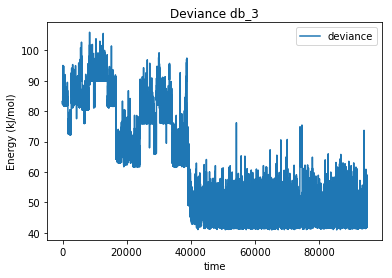

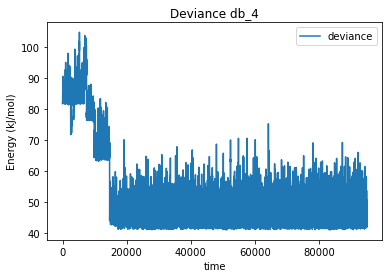

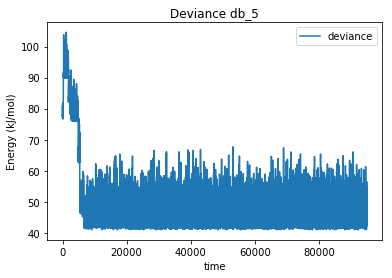

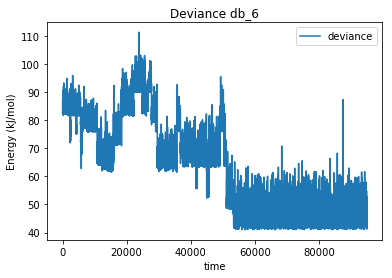

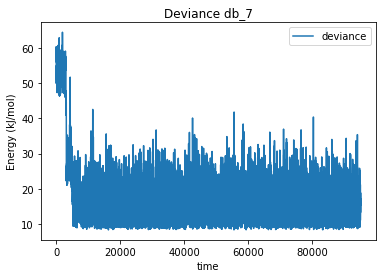

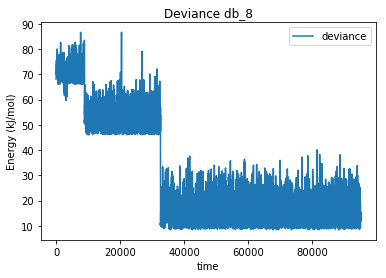

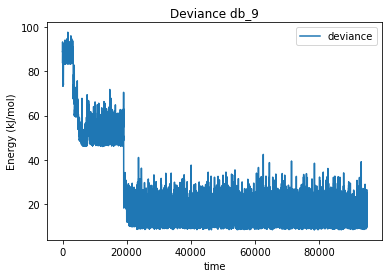

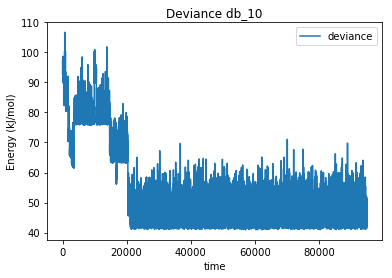

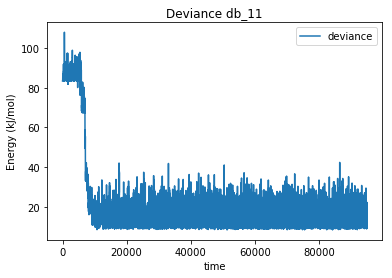

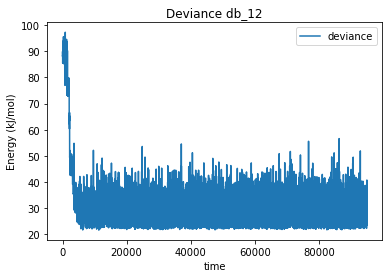

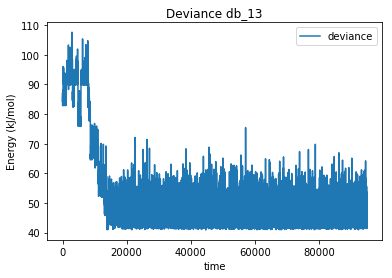

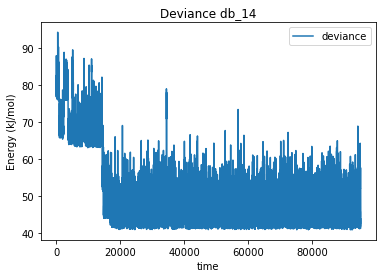

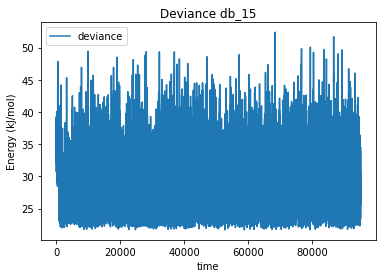

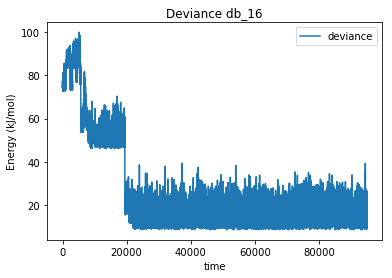

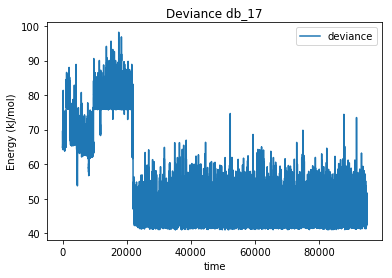

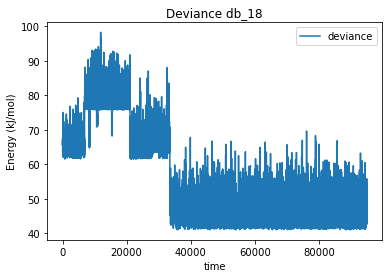

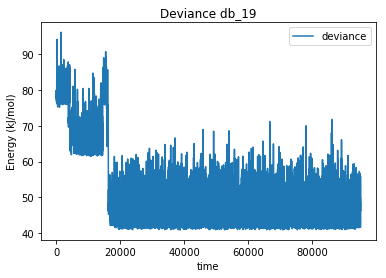

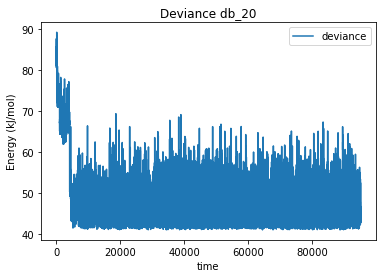

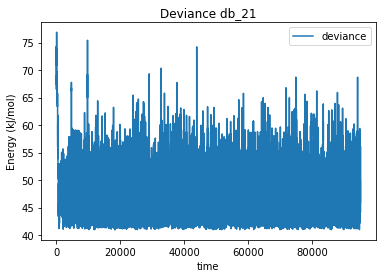

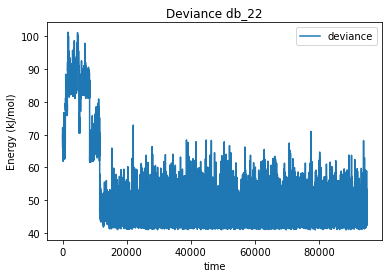

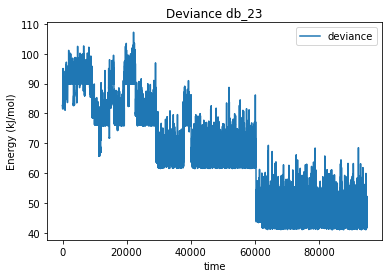

In [25]:
with PdfPages('deviance.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.figure()
        plt.plot(dbs[db].deviance[5000:], label='deviance')
        #plt.axvline(t_dev[i,0], color='red')
        #plt.text(t_dev[i, 0]+10, 8, r'$t_{equil}$', color='red', fontsize=20)
        plt.legend()
        plt.xlabel('time')
        plt.ylabel('Energy (kJ/mol)')
        plt.title("Deviance {}".format(db))
        pdf.savefig()

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


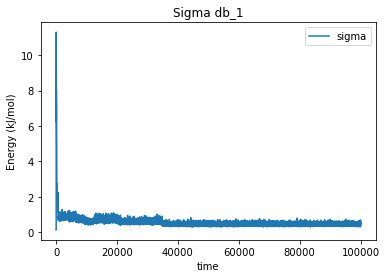

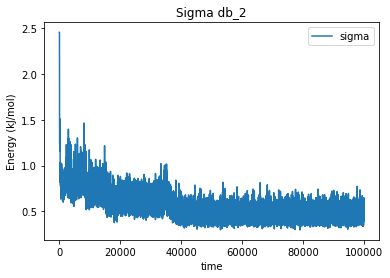

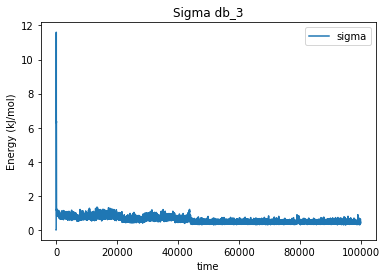

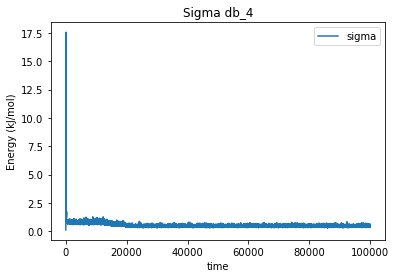

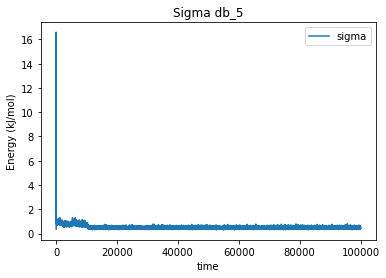

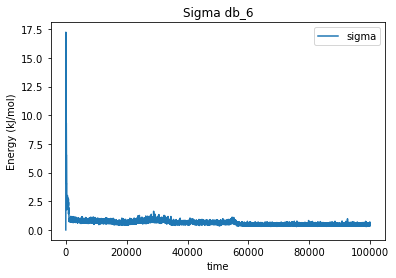

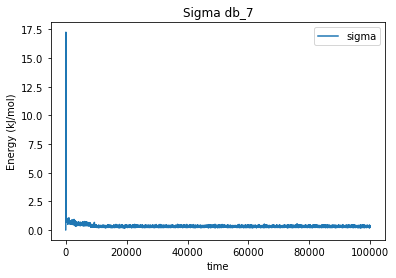

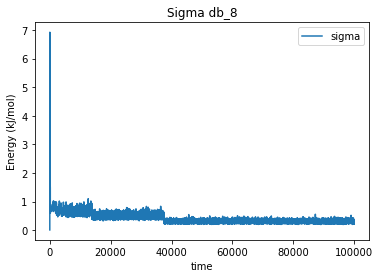

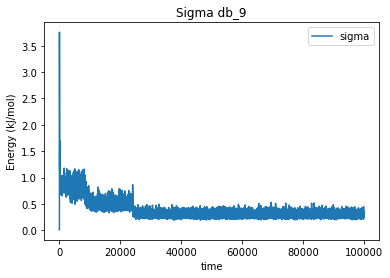

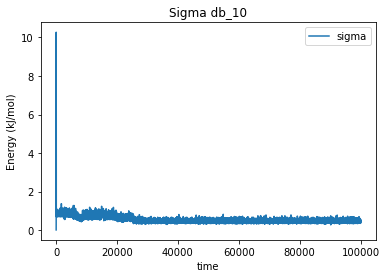

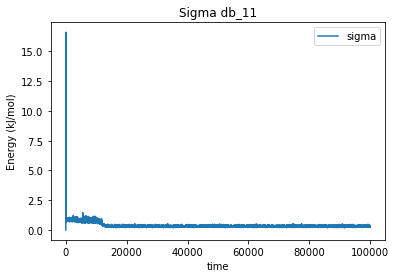

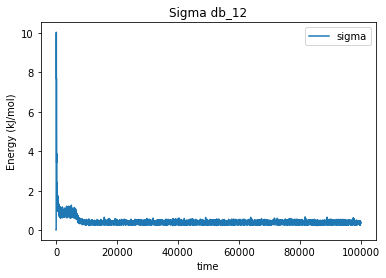

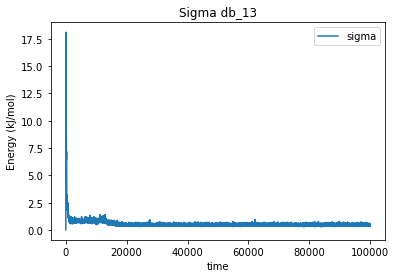

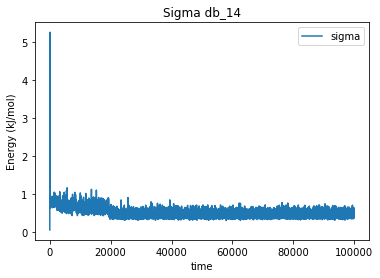

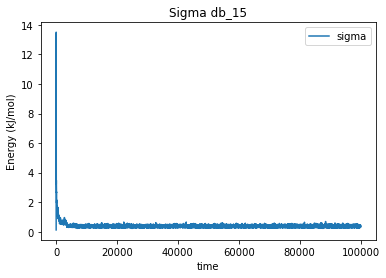

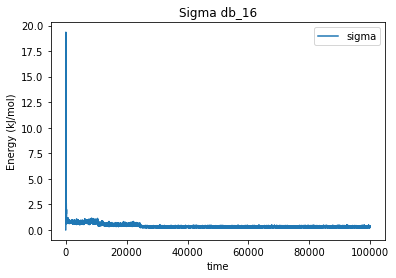

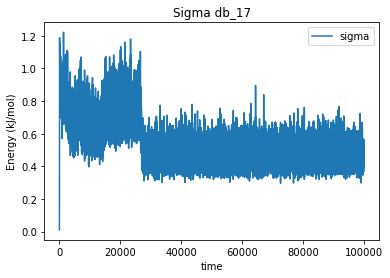

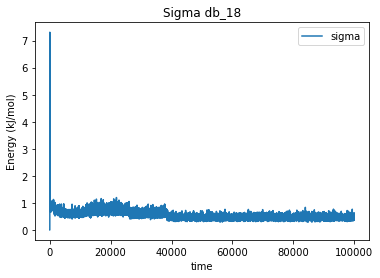

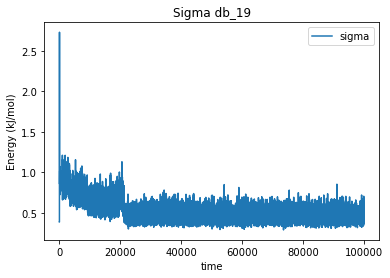

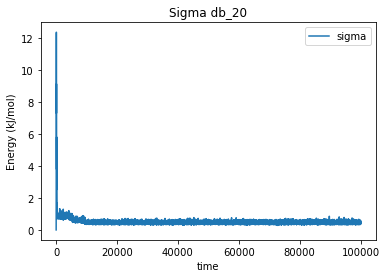

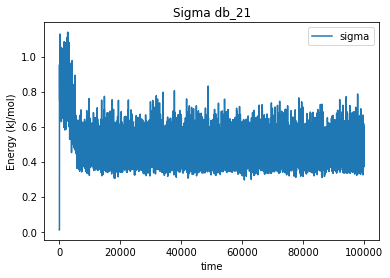

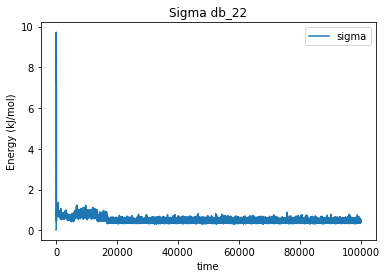

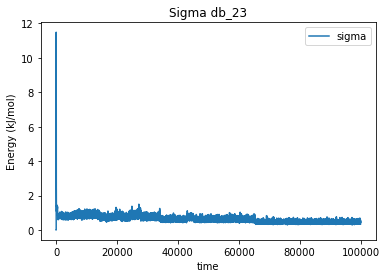

In [29]:
with PdfPages('sigma.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.figure()
        plt.plot((dbs[db].sigma[:]), label='sigma')
        plt.legend()
        plt.xlabel('time')
        plt.ylabel('Energy (kJ/mol)')
        plt.title("Sigma {}".format(db))
        pdf.savefig()

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


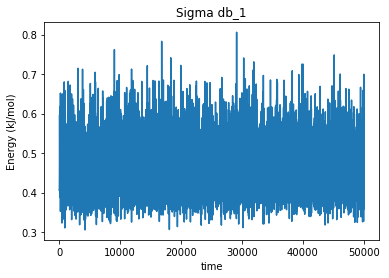

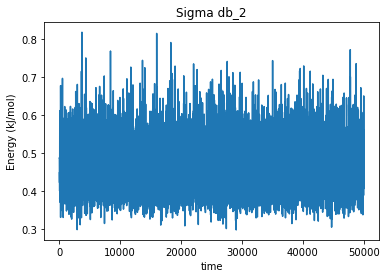

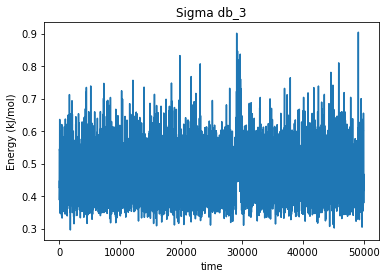

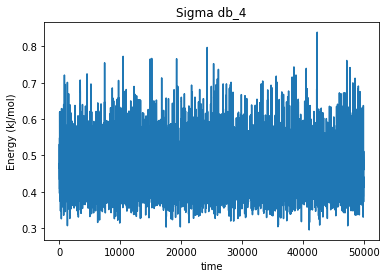

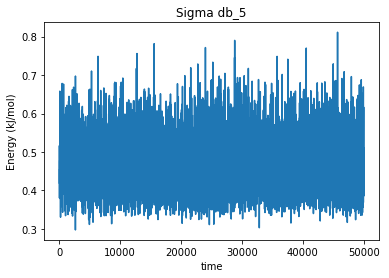

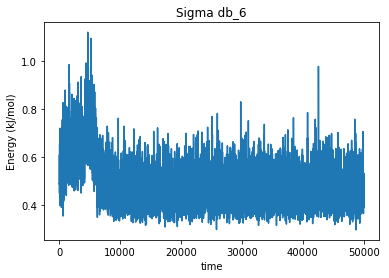

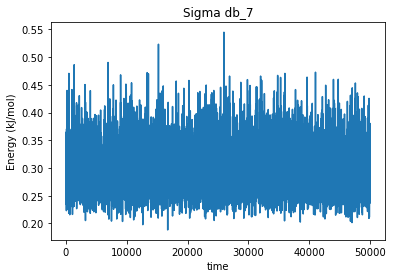

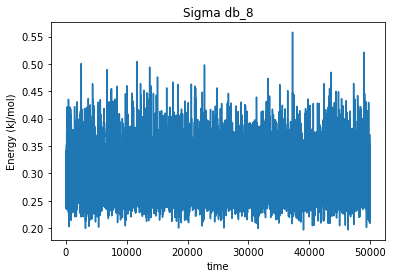

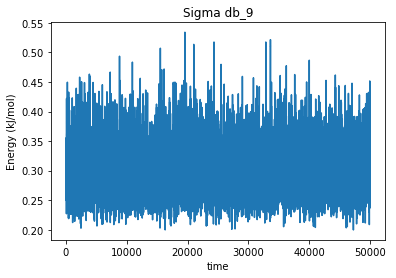

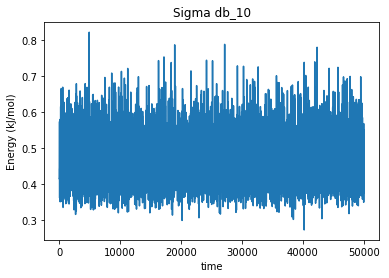

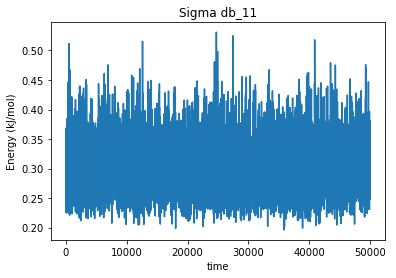

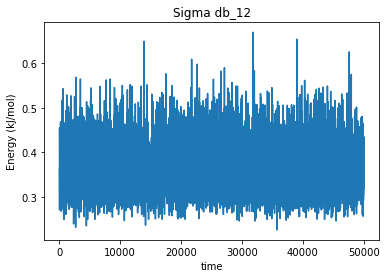

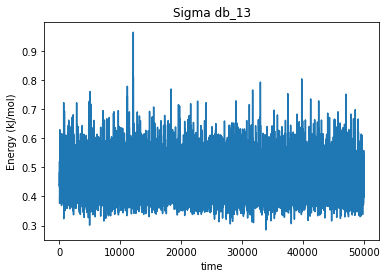

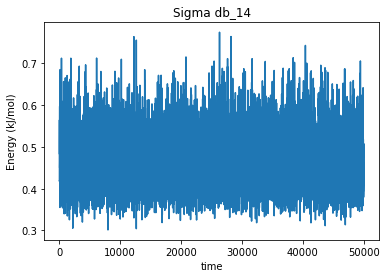

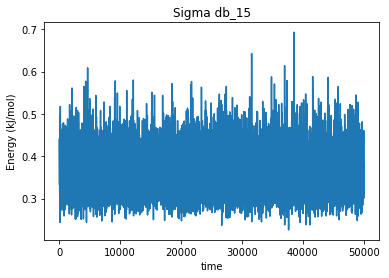

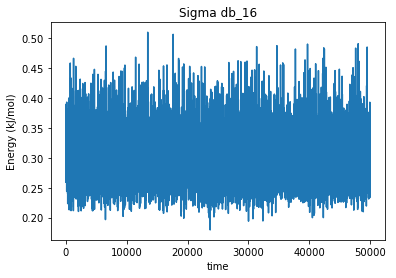

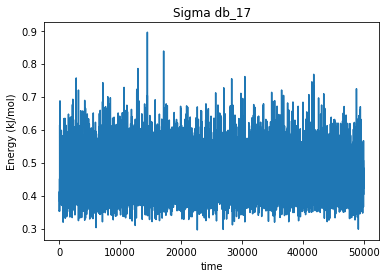

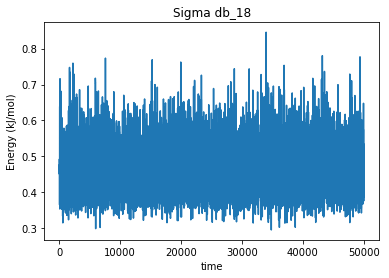

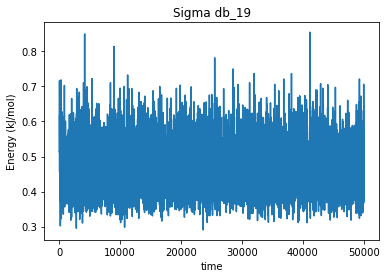

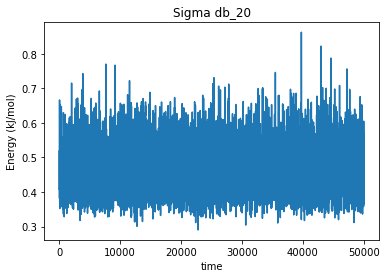

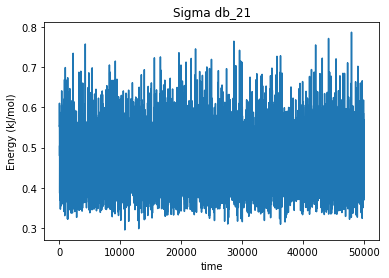

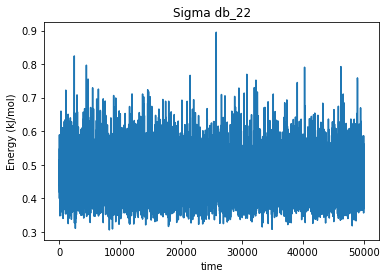

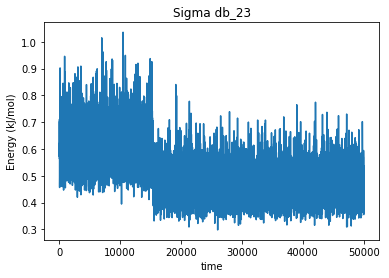

In [28]:
with PdfPages('sigma_equil.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.figure()
        plt.plot((dbs[db].sigma[50000:]), label='sigma')
        
        plt.xlabel('time')
        plt.ylabel('Energy (kJ/mol)')
        plt.title("Sigma {}".format(db))
        pdf.savefig()

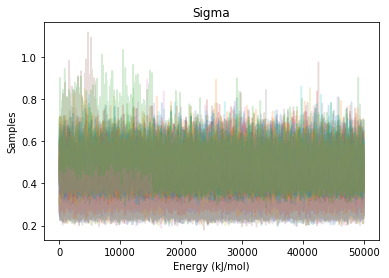

In [33]:
alpha=0.2
for i, db in enumerate(dbs):
    
    plt.plot(dbs[db].sigma[50000:], alpha=alpha)
    #lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('Energy (kJ/mol)')
    plt.ylabel('Samples')
    plt.title('Sigma')
    plt.savefig('sigma_all.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
     